In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [2]:
rawData = pd.read_csv('CreditOne_D.csv',index_col=0)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 30202
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [5]:
label_encoder = LabelEncoder()

In [7]:
rawData['default payment next month']= label_encoder.fit_transform(rawData['default payment next month']) 

In [8]:
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,0
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,1


In [9]:
credit=pd.get_dummies(rawData)

In [10]:
credit.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,0,0,0,0,1
1,2,120000,2,26,-1,2,0,0,0,2,...,1000,0,2000,0,1,0,0,0,0,1
2,3,90000,2,34,0,0,0,0,0,0,...,1000,1000,5000,1,1,0,0,0,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1100,1069,1000,1,1,0,0,0,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,9000,689,679,1,0,1,0,0,0,1


In [12]:
X_1=credit.drop('default payment next month', axis=1)
y_1=credit['default payment next month']

(array([ 6636.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 23364.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

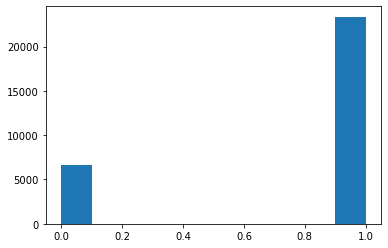

In [13]:
plt.hist(y)

In [14]:
algo = RandomForestClassifier()
algo.fit(X_1,y_1)
importance=algo.feature_importances_

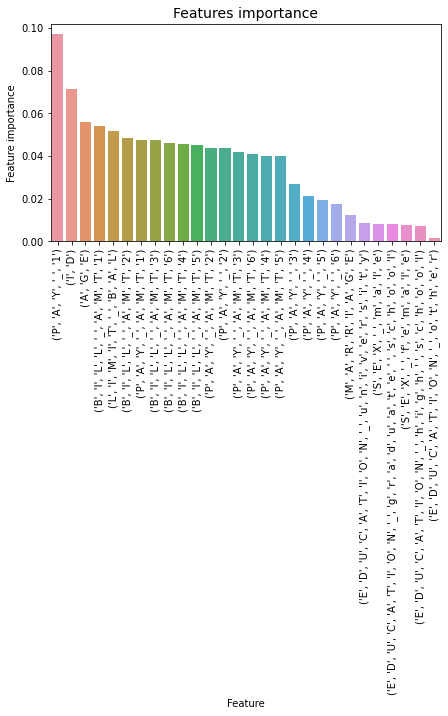

In [32]:
tmp = pd.DataFrame({'Feature': X_1, 'Feature importance': algo.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.savefig('Features Importance_Default', transparent=True, bbox_inches='tight')
plt.show()


In [18]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university'],
      dtype='object')


In [19]:
credit=credit.drop(columns=['ID', 'EDUCATION_other'])


In [20]:
credit.head()

,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,0,1,0,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,0,1,0,0,0,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,1,1,0,0,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,1,1,0,0,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,1,0,1,0,0,1


In [21]:
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine import discretisers as dsc

In [22]:
X=credit.drop('default payment next month', axis=1)
y=credit['default payment next month']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [24]:
disc = dsc.EqualFrequencyDiscretiser(q=10, variables=['LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [25]:
disc.fit(X_train)

EqualFrequencyDiscretiser(variables=['LIMIT_BAL', 'AGE', 'BILL_AMT1',
                                     'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
                                     'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                                     'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                                     'PAY_AMT5', 'PAY_AMT6'])

In [26]:
X_train_D= disc.transform(X_train)
X_test_D= disc.transform(X_test)

In [28]:
from sklearn import preprocessing

In [29]:
X_train_scaled = preprocessing.scale(X_train_D)
X_test_scaled=preprocessing.scale(X_test_D)

In [30]:
algoRF=RandomForestClassifier()
modelRF=algoRF.fit(X_train_scaled,y_train)

In [31]:
predictions = modelRF.predict(X_test_scaled)
print(accuracy_score(y_test,predictions))

0.8125333333333333
